0. Make a copy of this file. Rename it to "{your name} - HW1".

1. You can't average percentile. Read the blog post about why sometimes people want to average percentile and why it's incorrect: http://latencytipoftheday.blogspot.com/2014/06/latencytipoftheday-you-cant-average.html

2. Give an example of integer arrays for which p99 of the combined array is very different from an average of p99 of initial arrays. Plot both the initial raw data arrays on a bar chart and show the p99 for them. Plot the combined array in a chart bar and show the p99 for them.

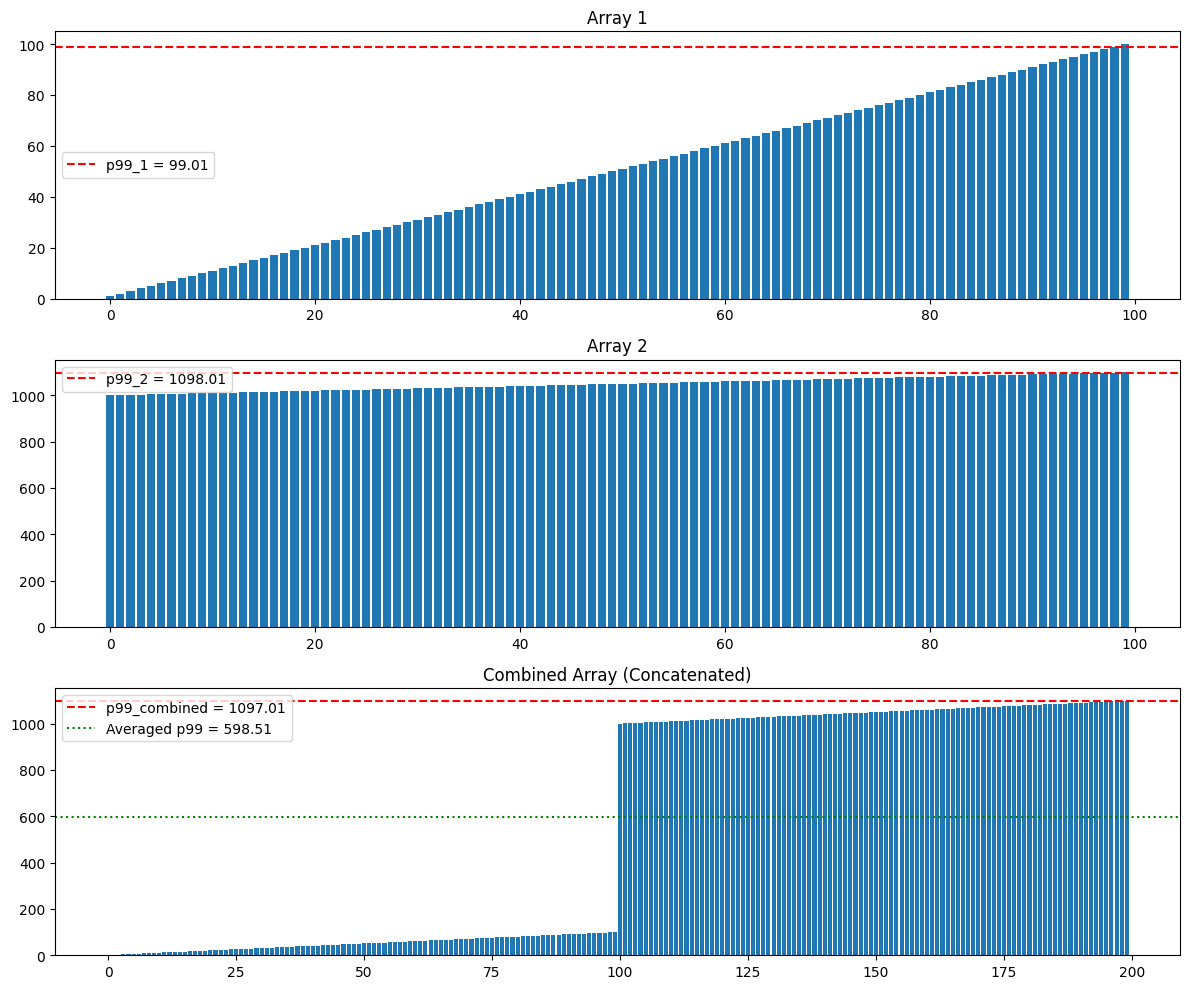

p99 of Array 1: 99.01
p99 of Array 2: 1098.01
Average of p99s: 598.51
p99 of Combined Array: 1097.01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

array1 = np.arange(1, 101)
p99_1 = np.percentile(array1, 99)

array2 = np.arange(10**3, 10**3 + 100)
p99_2 = np.percentile(array2, 99)

averaged_p99 = (p99_1 + p99_2) / 2

combined_array = np.concatenate((array1, array2))
p99_combined = np.percentile(combined_array, 99)

fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=False)

axs[0].bar(range(len(array1)), array1)
axs[0].axhline(p99_1, color='red', linestyle='--', label=f"p99_1 = {p99_1:.2f}")
axs[0].set_title("Array 1")
axs[0].legend()

axs[1].bar(range(len(array2)), array2)
axs[1].axhline(p99_2, color='red', linestyle='--', label=f"p99_2 = {p99_2:.2f}")
axs[1].set_title("Array 2")
axs[1].legend()

axs[2].bar(range(len(combined_array)), combined_array)
axs[2].axhline(p99_combined, color='red', linestyle='--', label=f"p99_combined = {p99_combined:.2f}")
axs[2].axhline(averaged_p99, color='green', linestyle=':', label=f"Averaged p99 = {averaged_p99:.2f}")
axs[2].set_title("Combined Array (Concatenated)")
axs[2].legend()

plt.tight_layout()
plt.show()

print(f"p99 of Array 1: {p99_1:.2f}")
print(f"p99 of Array 2: {p99_2:.2f}")
print(f"Average of p99s: {averaged_p99:.2f}")
print(f"p99 of Combined Array: {p99_combined:.2f}")

3. Give an example of 10 integer arrays for which p90 of the combined array is very different from a p90 of p90's for initial arrays. Plot the combined array and it's p90. Print out p90 of original arrays.

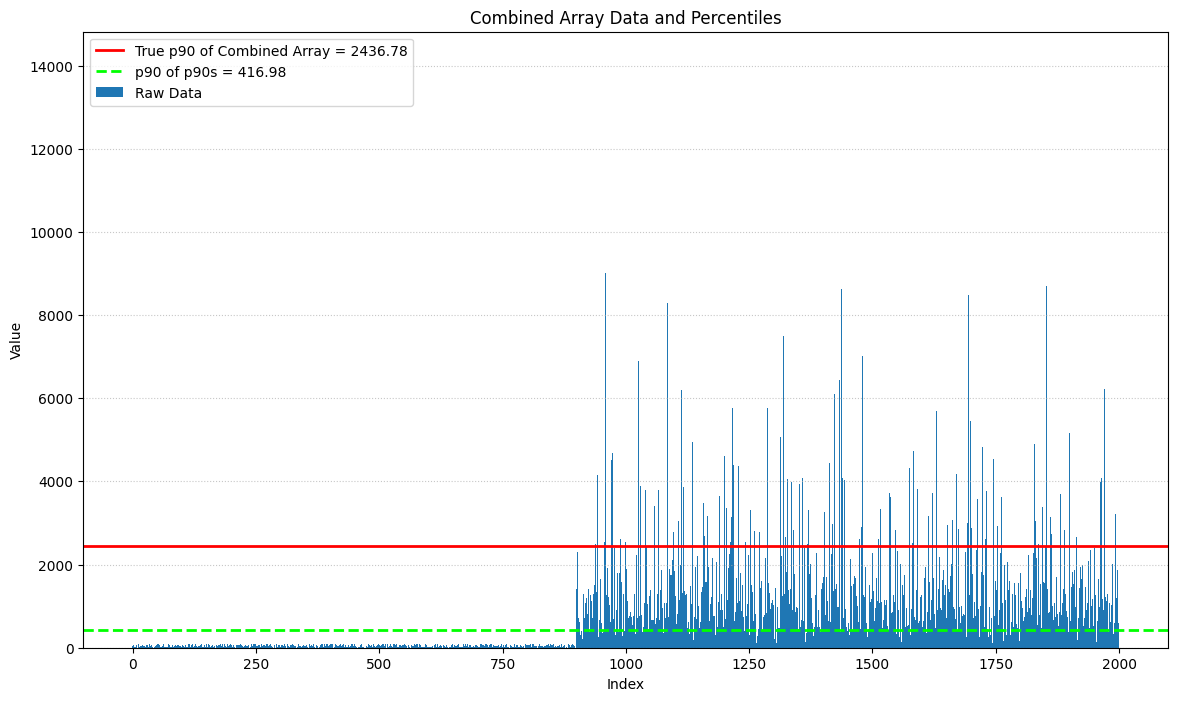

--- p90 of each initial array ---
p90 of array[0]: 88.91
p90 of array[1]: 89.86
p90 of array[2]: 90.10
p90 of array[3]: 86.17
p90 of array[4]: 95.09
p90 of array[5]: 92.79
p90 of array[6]: 82.37
p90 of array[7]: 90.13
p90 of array[8]: 89.75
p90 of array[9]: 3313.95

--- Final Comparison ---
p90 of p90s: 416.98
True p90 of combined array: 2436.78


In [ ]:
np.random.seed(42)

arrays = [
    np.random.uniform(1, 100, 100)
    for i in range(9)
] + [np.random.lognormal(mean=7, sigma=0.8, size=1100)]

combined_array = [x for array in arrays for x in array]

p90s_list = [np.percentile(arr, 90) for arr in arrays]

p90_of_p90s = np.percentile(p90s_list, 90)

true_p90 = np.percentile(combined_array, 90)

plt.figure(figsize=(14, 8))
plt.bar(range(len(combined_array)), combined_array, width=1.0, label='Raw Data')

plt.axhline(true_p90, color='red', linestyle='-', linewidth=2,
            label=f'True p90 of Combined Array = {true_p90:.2f}')
plt.axhline(p90_of_p90s, color='lime', linestyle='--', linewidth=2,
            label=f'p90 of p90s = {p90_of_p90s:.2f}')

plt.title('Combined Array Data and Percentiles')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.show()

print("--- p90 of each initial array ---")
for i, p90_val in enumerate(p90s_list):
    print(f"p90 of array[{i}]: {p90_val:.2f}")

print("\n--- Final Comparison ---")
print(f"p90 of p90s: {p90_of_p90s:.2f}")
print(f"True p90 of combined array: {true_p90:.2f}")

4. The easiest way to get correct percentile combined data is to store all the raw data. But is this case the memory grows linearly with raw data. One of the approaches to calculate percentile for combined data is to using histograms. You can read about it here: https://psy-lob-saw.blogspot.com/2015/02/hdrhistogram-better-latency-capture.html. Calculate p90 for combined array from previous section using histograms (you don't have to implement histogram, you can use numpy.histogram). Compare the p90 you got from histogram with true p90. Try histograms with different number of bins. Plot these histograms, true p90 and p90 from histogram.

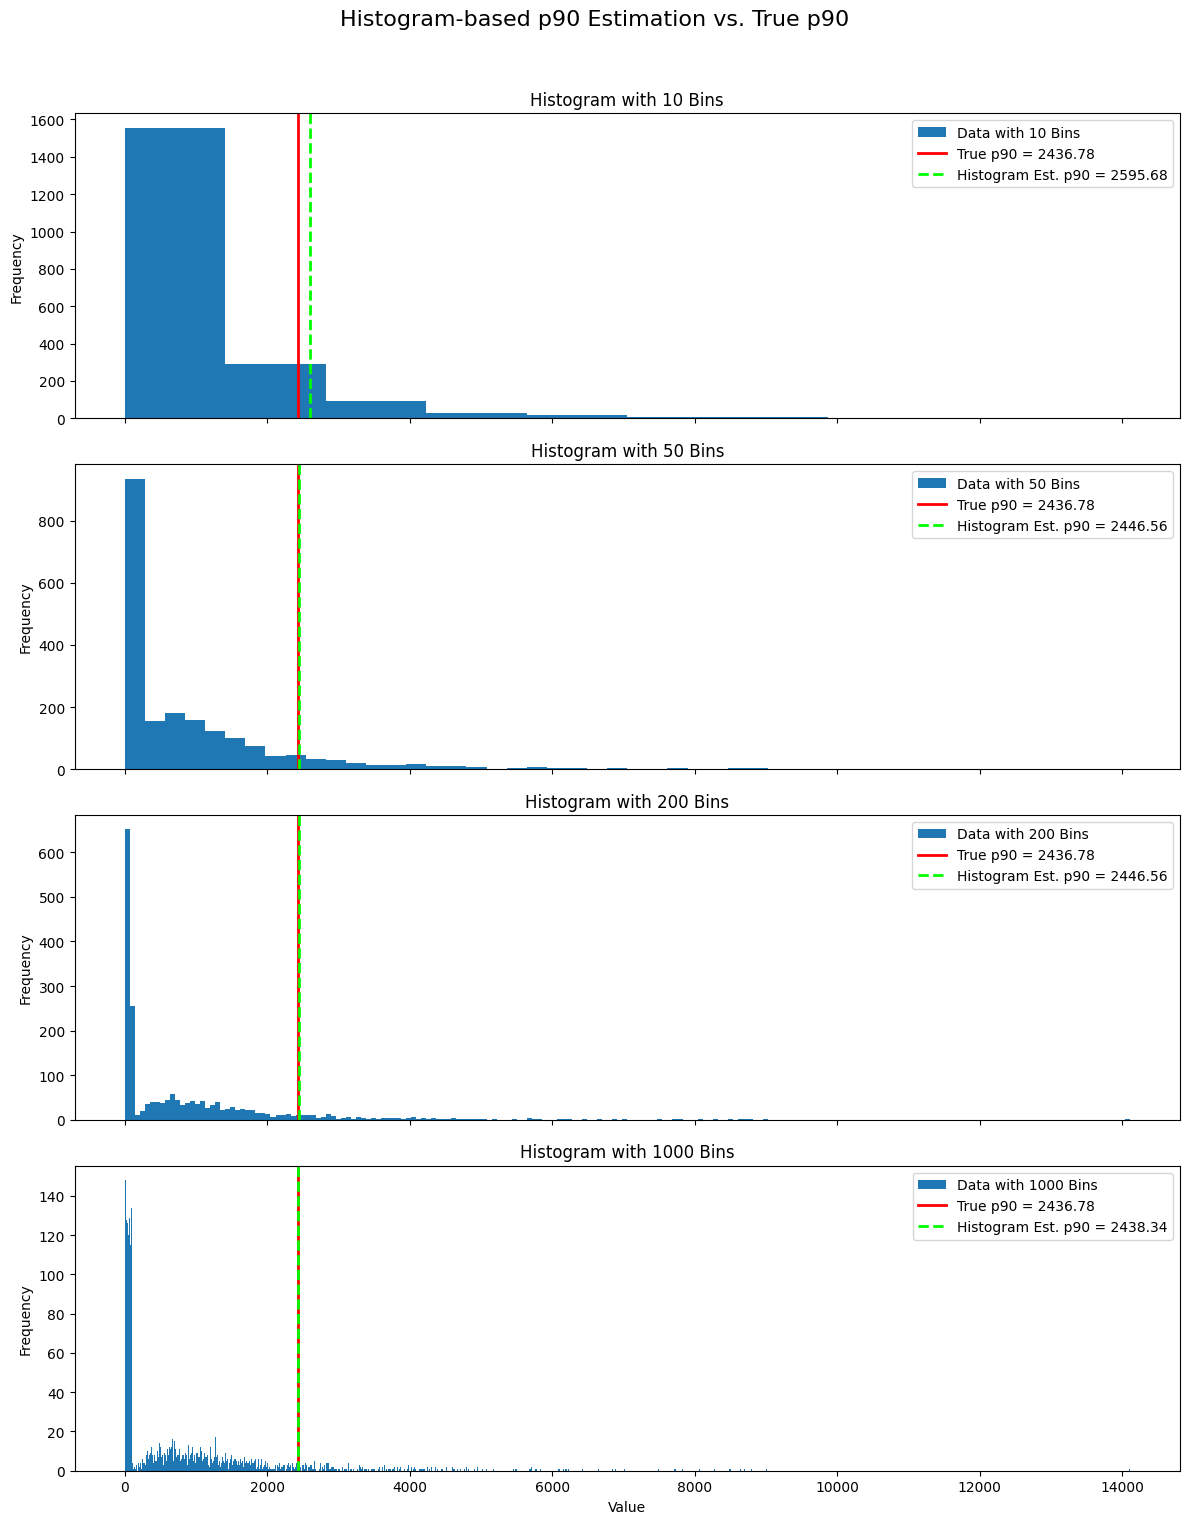

--- Comparison of True p90 vs. Histogram-based p90 ---
True p90 from raw data: 2436.78
------------------------------------------------------------
Bins       | Estimated p90        | Error           | Error %
------------------------------------------------------------
10         | 2595.68              | 158.90          | 6.52%
50         | 2446.56              | 9.79            | 0.40%
200        | 2446.56              | 9.79            | 0.40%
1000       | 2438.34              | 1.56            | 0.06%


In [ ]:
def percentile_from_histogram(counts, bin_edges, percentile):
    total_count = counts.sum()
    target_count = total_count * (percentile / 100.0)

    cumulative_counts = np.cumsum(counts)
    bin_index = np.searchsorted(cumulative_counts, target_count)

    if bin_index < len(cumulative_counts) and target_count == cumulative_counts[bin_index]:
        return bin_edges[bin_index + 1]

    if bin_index >= len(counts):
        return bin_edges[-1]

    cumulative_count_before = cumulative_counts[bin_index - 1] if bin_index > 0 else 0
    count_in_target_bin = counts[bin_index]

    if count_in_target_bin == 0:
        return bin_edges[bin_index]

    fraction = (target_count - cumulative_count_before) / count_in_target_bin
    bin_width = bin_edges[bin_index + 1] - bin_edges[bin_index]
    estimated_percentile = bin_edges[bin_index] + fraction * bin_width

    return estimated_percentile

bin_options = [10, 50, 200, 1000]
estimated_p90s = {}

for num_bins in bin_options:
    counts, bin_edges = np.histogram(combined_array, bins=num_bins)
    p90_hist = percentile_from_histogram(counts, bin_edges, 90)
    estimated_p90s[num_bins] = p90_hist

fig, axs = plt.subplots(len(bin_options), 1, figsize=(12, 16), sharex=True)
fig.suptitle('Histogram-based p90 Estimation vs. True p90', fontsize=16)

for i, num_bins in enumerate(bin_options):
    ax = axs[i]
    p90_hist = estimated_p90s[num_bins]

    ax.hist(combined_array, bins=num_bins, label=f'Data with {num_bins} Bins')
    ax.set_title(f'Histogram with {num_bins} Bins')
    ax.set_ylabel('Frequency')

    ax.axvline(true_p90, color='red', linestyle='-', linewidth=2,
                label=f'True p90 = {true_p90:.2f}')
    ax.axvline(p90_hist, color='lime', linestyle='--', linewidth=2,
                label=f'Histogram Est. p90 = {p90_hist:.2f}')
    ax.legend()

plt.xlabel('Value')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

print("--- Comparison of True p90 vs. Histogram-based p90 ---")
print(f"True p90 from raw data: {true_p90:.2f}")
print("-" * 60)
print(f"{'Bins':<10} | {'Estimated p90':<20} | {'Error':<15} | {'Error %'}")
print("-" * 60)
for num_bins, p90_hist in estimated_p90s.items():
    error = abs(true_p90 - p90_hist)
    error_percent = (error / true_p90) * 100
    print(f"{num_bins:<10} | {p90_hist:<20.2f} | {error:<15.2f} | {error_percent:.2f}%")